# **多层感知机从零实现**

In [1]:
import torch  
from torch import nn  
from d2l import torch as d2l

In [2]:
batch_size = 256  
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

实现一个具有但隐藏层的多层感知机，它包含256个单元

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256  # 输入784，输出10，隐藏层大小256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)  # 声明是torch的一个参数(W初始成一个随机的(行数是784，列数是256，更新梯度))
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))  # 偏差是隐藏层大小决定

W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)  
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))  

params = [W1, b1, W2, b2]

实现ReLU激活函数

In [4]:
def relu(X):
    a = torch.zeros_like(X)  # 生成一个数据类型一样的0矩阵
    return torch.max(X,a)  # 取最大值

实现模型

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

损失函数

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')             

多层感知机的训练过程和Softmax的训练过程完全相同

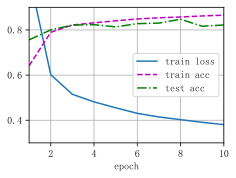

In [7]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

测试

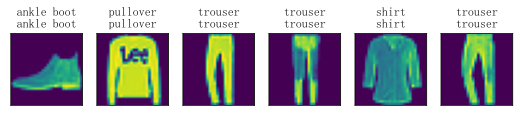

In [8]:
d2l.predict_ch3(net, test_iter)